As a Canadian I felt committed to cheering on the Toronto Raptors during the NBA finals. To further show my national pride, I decided to do a network analysis of passes made by players on the Toronto Raptors during the NBA finals against the Golden State Warriors. To do this, I needed to gather data on all the games played from the NBA API, but guess what? The NBA doesn't have an official API. Thanks to [Swar Patel](https://github.com/swar), there is an unofficial API [here](https://github.com/swar/nba_api). What's funny is, before I realized there was an API, I was trying to scrape the NBA website myself. There is a very hacky way of getting data from tables and charts on websites that don't have an official API, which I may write about in a future post.

I then use the *__networkx__* package for the analysis. 

As per usual, 90% of my time was spent collecting data, while 10% was spent on actual analysis 💀.

## Data
The unofficial NBA API is very easy to use. The documentation is straight forward and there are also some examples provided. I discovered that it pulls data directly from https://stats.nba.com through repeated requests. The NBA stats page looks like this for [Kawhi Leonard](https://stats.nba.com/player/202695/passes-dash/?Season=2018-19&SeasonType=Playoffs&OpponentTeamID=1610612744&PerMode=Totals):

<img src="nba_stats_example.PNG" width="1000">

The steps I completed to get the data in its final CSV form for analysis are as follows:

1. Get team IDs for Raptors and Golden State
    - use the static part of API to access team information
2. Get all the players on Raptors
    - use the CommonTeamRoster endpoint
3. For each player, get their passes received and passes made
    - use the PlayerDashPtPass endpoint
4. Create dataframe with all passes
    - use the `append()` and `concat()` methods in  pandas

## Network Analysis
What the heck is it? I don't really know since I am in the process of learning about network analysis. However, I do know that it involves making these types of charts:

<img src="network_diagram_example.png" width="500">

In all seriousness, though, network analysis could be as simple as producing the graph above in order to show the relationships between individual actors. It could also be as complicated as applying complex algorithms to these relationships and actors to measure various characteristics of networks. For now, I will keep it simple and plot the relationships (passes) between Toronto Raptors players (actors).

## Toronto Raptors network of passes

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

In [7]:
passes_received = pd.read_csv('tor_passes_received.csv')[['PLAYER_NAME_LAST_FIRST', 'PASS_FROM', 'PASS']]

### Basic graph

This is the most basic form of a network graph. It simply plots the instance of a link (edge) between each node. That is, if a player has passed to another player in the finals, there will be a line connecting them. This isn't very interesting. What if we want to see where the passes are concentrated?

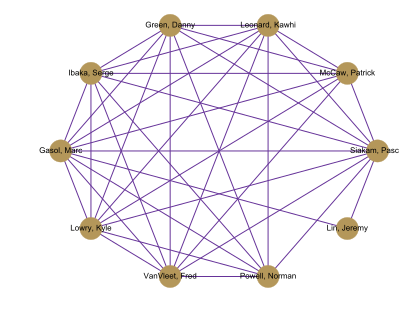

In [66]:
import networkx as nx

G=nx.from_pandas_edgelist(passes_received, 'PASS_FROM', 'PLAYER_NAME_LAST_FIRST')
pos = nx.circular_layout(G)
edges = G.edges()
plt.figure(figsize=(5,4)) 
nx.draw(G, pos, edges=edges, node_color='#b4975a', edge_color='rebeccapurple', node_size=500)
nx.draw_networkx_labels(G,pos=pos, font_size=8)
%config InlineBackend.figure_format = 'svg'

### Graph with edge widths determined by number of passes

We can see where the passes are concentrated by applying different line thicknesses to the edges. This can be done by using the `width` argument in the `draw_networkx_edges` networkx method.

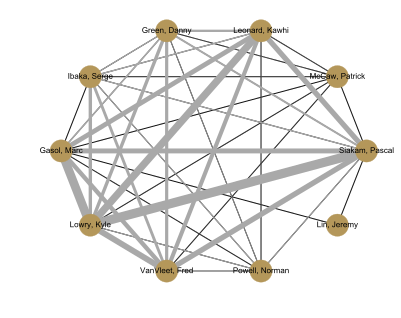

In [57]:
G=nx.from_pandas_edgelist(passes_received, 'PASS_FROM', 'PLAYER_NAME_LAST_FIRST', edge_attr='PASS')
passes = [i['PASS'] / 10 for i in dict(G.edges).values()]

pos = nx.circular_layout(G)
plt.figure(figsize=(5,4)) 
nx.draw(G, pos)
nx.draw_networkx_nodes(G, pos, node_color='#b4975a', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='darkgrey', width=passes)
nx.draw_networkx_labels(G,pos=pos, font_size=8)
%config InlineBackend.figure_format = 'svg'

### Directed graph with edge colours determined by number of passes

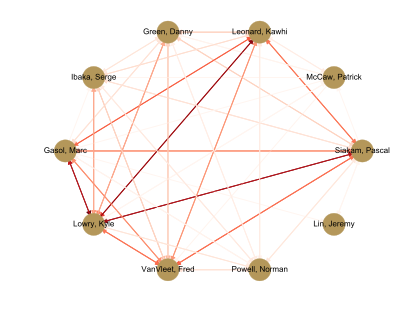

In [64]:
G=nx.from_pandas_edgelist(passes_received, 'PASS_FROM', 'PLAYER_NAME_LAST_FIRST', edge_attr='PASS', create_using=nx.DiGraph())
passes = [i['PASS'] / 10 for i in dict(G.edges).values()]

pos = nx.circular_layout(G)
plt.figure(figsize=(5,4)) 
nx.draw(G, pos, edge_color=passes, edge_cmap=plt.cm.Reds)
nx.draw_networkx_nodes(G, pos, node_color='#b4975a', node_size=500) # gold  #b4975a red #ce1141 grey #a1a1a4
nx.draw_networkx_labels(G,pos=pos, font_size=8)
%config InlineBackend.figure_format = 'svg'